<h4>Question 1: Use yfinance to Extract Stock Data</h4>

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [50]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup
tesla = yf.Ticker("GME")
gme_data = tesla.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


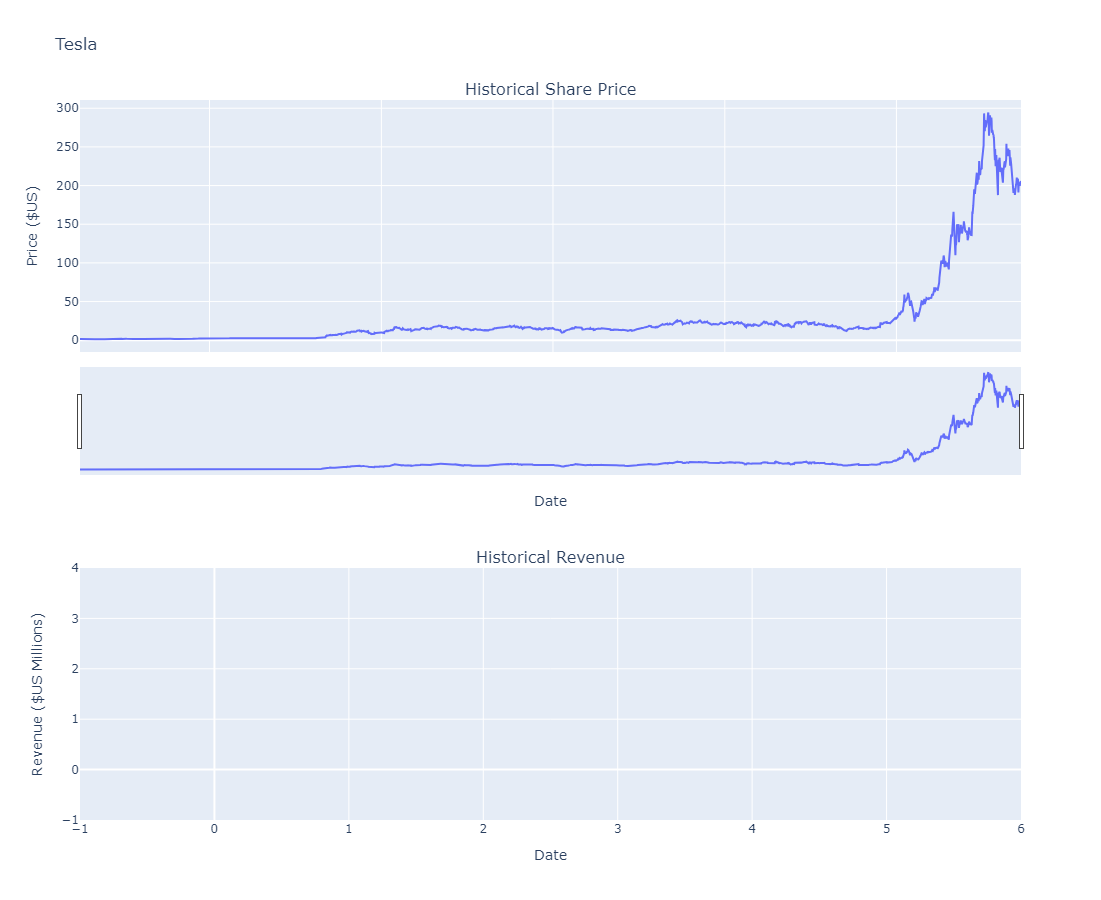

In [76]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig=go.Figure()
def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig=make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,height=900,title=stock,xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')

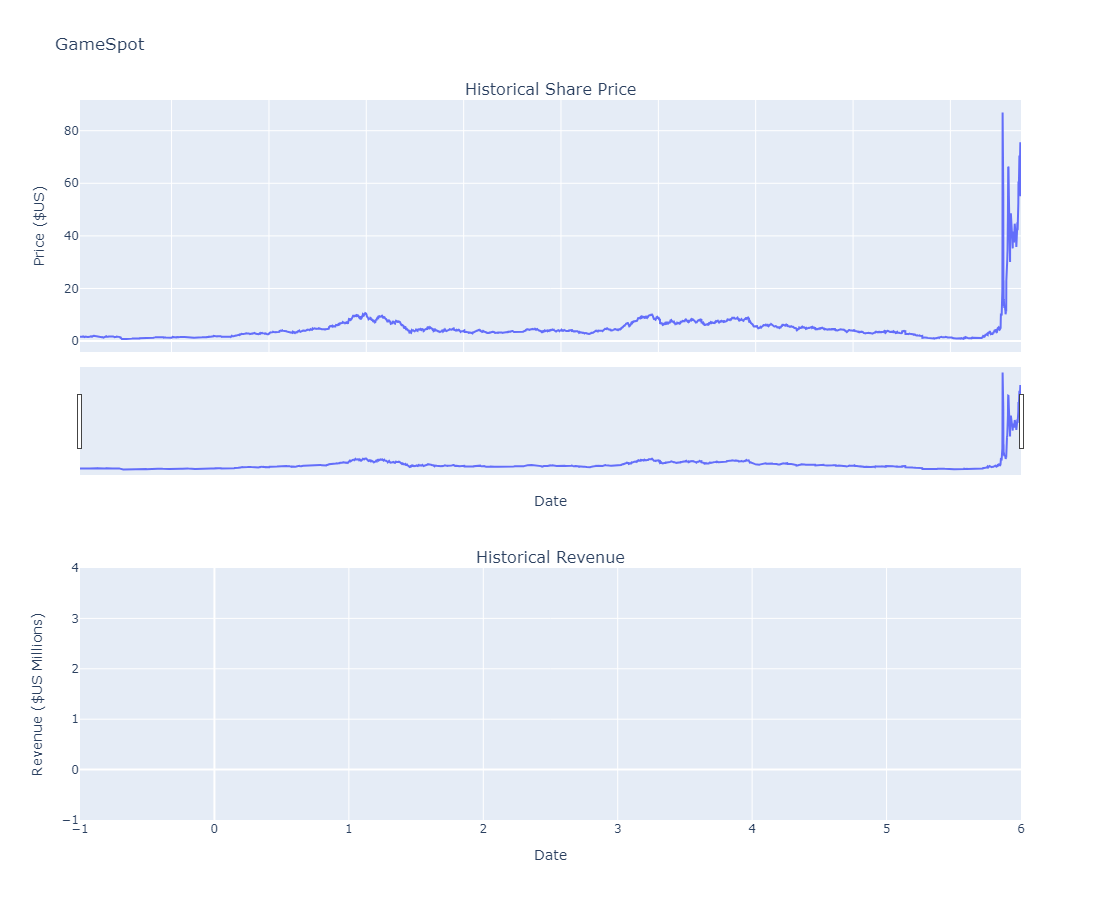

In [92]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig=go.Figure()
def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig=make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,height=900,title=stock,xaxis_rangeslider_visible=True)
    fig.show()
make_graph(gme_data, gme_revenue, 'GameSpot')

In [100]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Load the HTML content from the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Step 2: Initialize an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 3: Find all tables on the page
tables = soup.find_all("table")

# Step 4: Loop through all tables and find the relevant one
for table in tables:
    if "GME Quarterly Revenue" in table.text:
        # Step 5: Loop through each row in the relevant table and extract date and revenue
        rows = table.find_all("tr")
        for row in rows[1:]:  # Skip the header row
            cols = row.find_all("td")
            if len(cols) >= 2:  # Ensure there are at least two columns
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                
                # Append the extracted data to the DataFrame
                gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Step 6: Clean the 'Revenue' column by removing commas and dollar signs
gme_revenue.dropna(inplace=True)
gme_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
gme_revenue.tail(5)


,Date,Revenue


In [98]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Web scraping Tesla revenue data (you need to run this first to define tesla_revenue)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all("table")

# Find the relevant table with Tesla's revenue data
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:  # Only take rows with two columns
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)
tesla_revenue.tail(5)


C:\Users\LENOVO\anaconda3\Lib\html\parser.py:171: XMLParsedAsHTMLWarning:

It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.



,Date,Revenue
